# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [26]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [27]:
from palmerpenguins import load_penguins

df_penguins = load_penguins()
df_penguins = df_penguins.dropna()

X = df_penguins.drop("bill_depth_mm", axis=1)
y = df_penguins["bill_depth_mm"]

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [28]:
# Best Multiple Linear Regression Model

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex", "island", "species"]),
    ("standardize", StandardScaler(), ["bill_length_mm", "body_mass_g", "flipper_length_mm"])
  ],
  remainder = "drop"
)

pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

linear_mse = cross_val_score(pipeline, X, y, cv = 5, scoring = "neg_mean_squared_error").mean() * -1

In [29]:
# kNN Model with k=5

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex", "island", "species"]),
    ("standardize", StandardScaler(), ["bill_length_mm", "body_mass_g", "flipper_length_mm"])
  ],
  remainder = "drop"
)

pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", KNeighborsRegressor(n_neighbors=5))]
).set_output(transform="pandas")

knn_5 = cross_val_score(pipeline, X, y, cv = 5, scoring = "neg_mean_squared_error").mean() * -1

In [30]:
# kNN Model with k=10

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex", "island", "species"]),
    ("standardize", StandardScaler(), ["bill_length_mm", "body_mass_g", "flipper_length_mm"])
  ],
  remainder = "drop"
)

pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", KNeighborsRegressor(n_neighbors=10))]
).set_output(transform="pandas")

knn_10 = cross_val_score(pipeline, X, y, cv = 5, scoring = "neg_mean_squared_error").mean() * -1

In [31]:
# Decision Tree Regressor

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex", "island", "species"]),
    ("standardize", StandardScaler(), ["bill_length_mm", "body_mass_g", "flipper_length_mm"])
  ],
  remainder = "drop"
)

pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", DecisionTreeRegressor())]
).set_output(transform="pandas")

decision_tree = cross_val_score(pipeline, X, y, cv = 5, scoring = "neg_mean_squared_error").mean() * -1

In [36]:
model_mse = pd.DataFrame({
    "Model": ["Multiple_Linear", "kNN_5", "kNN_10", "Decision_Tree"],
    "MSE": [linear_mse, knn_5, knn_10, decision_tree]
})

model_mse

,Model,MSE
0,Multiple_Linear,0.805461
1,kNN_5,1.134980
2,kNN_10,1.123717
3,Decision_Tree,1.500905


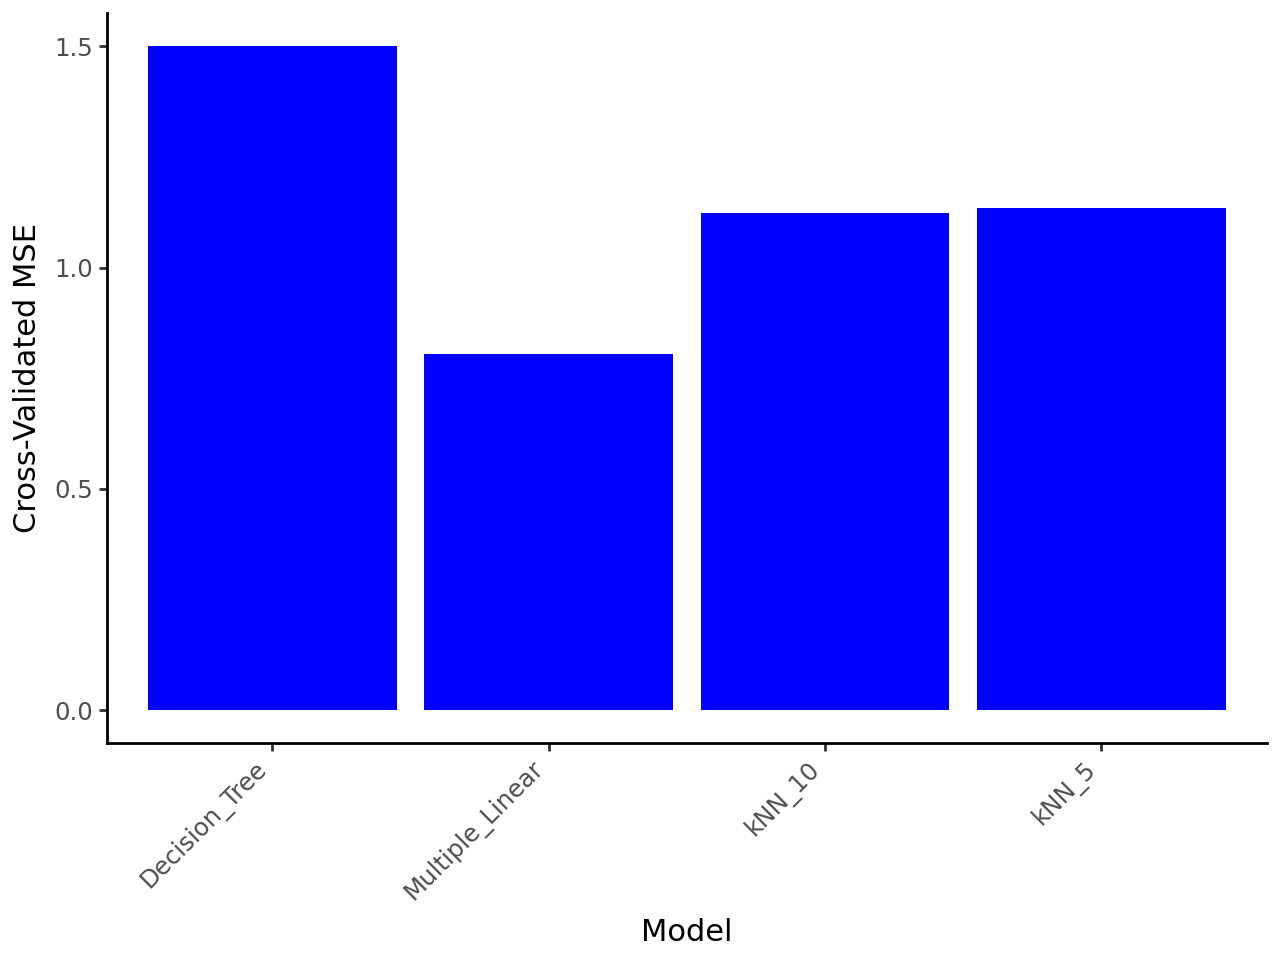

In [39]:
from plotnine import ggplot, aes, geom_bar, labs, theme_classic, theme, element_text

(ggplot(model_mse, aes(x="Model", y="MSE")) +
geom_bar(stat="identity", fill="blue") + 
theme_classic() +
theme(axis_text_x=element_text(rotation=45, hjust=1)) +
labs(x="Model", y="Cross-Validated MSE"))